In [2]:
import torch

In [3]:
from torch.nn.utils.rnn import pad_sequence

In [4]:
a = torch.ones(25,300)

In [5]:
b = torch.ones(22,300)

In [6]:
c = torch.ones(15,300)

In [ ]:
pad_sequence([a,b,c]).size()#按照批次内最长的样本去填充其他样本
#跨批次不需要对其一个相同的seq_length

torch.Size([25, 3, 300])

In [8]:
from torch.nn.utils.rnn import pack_padded_sequence,pad_packed_sequence

In [9]:
seq = torch.tensor([[1,2,0],[3,0,0],[4,5,6]])

In [10]:
lens = [2,1,3]

In [11]:
packed = pack_padded_sequence(seq, lens, batch_first=True, enforce_sorted=False)

In [12]:
packed

PackedSequence(data=tensor([4, 1, 3, 5, 2, 6]), batch_sizes=tensor([3, 2, 1]), sorted_indices=tensor([2, 0, 1]), unsorted_indices=tensor([1, 2, 0]))

In [14]:
packed_sort = pack_padded_sequence(seq, lens, batch_first=True, enforce_sorted=True)

RuntimeError: `lengths` array must be sorted in decreasing order when `enforce_sorted` is True. You can pass `enforce_sorted=False` to pack_padded_sequence and/or pack_sequence to sidestep this requirement if you do not need ONNX exportability.

In [15]:
seq_sort = [[4,5,6],[1,2,0],[3,0,0]]

In [16]:
len_sort = [3,2,1]

In [19]:
packed_sort = pack_padded_sequence(
    seq, len_sort, batch_first=True, enforce_sorted=True)

In [20]:
packed_sort

PackedSequence(data=tensor([1, 3, 4, 2, 0, 0]), batch_sizes=tensor([3, 2, 1]), sorted_indices=None, unsorted_indices=None)

In [21]:
seq_sort

[[4, 5, 6], [1, 2, 0], [3, 0, 0]]

In [13]:
seq

tensor([[1, 2, 0],
        [3, 0, 0],
        [4, 5, 6]])

seq送给rnn是按照时间片，batch内按照逐列去处理，即先处理所有的第一列，1，3，4；205；006
指定的batch_size 一定是降序的（才可以压缩省空间）， 3，2，1 表示 数据的有效长度是 3，2，1

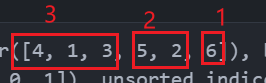

batch_first = True 表示数据第一位表示 batch；

enforce_sorted  表示是否按照数据长度对原始的数据在batch内部排序，即[[4,5,6],[1,2,0][3,0,0]],对应的lens 参数也变成 [3,2,1]

原始传递的lens是和样本中的有效样本个数是保持一致的。如果enfore_sorted为True,则指定的lens必须是降序的 --- 代码不会检查batch内数据的长度，会根据指定的lens 去压缩，即使lens的顺序无法正常压缩


sorted_indices 表示原始的索引被排序后的顺序在这里并表示索引为2的[4，5，6]排第一位，索引为0的[1,2,0]排第二位，索引为1的[0，0，6]排第三位 即排序后的索引为[2,0,1]
